In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def is_safe(node, color, coloring, graph):
    for neighbor in graph.neighbors(node):
        if coloring.get(neighbor) == color:
            return False
    return True

def graph_coloring_util(graph, colors, coloring, node_list, index):
    if index == len(node_list):
        return True
    
    node = node_list[index]
    for color in range(colors):
        if is_safe(node, color, coloring, graph):
            coloring[node] = color
            if graph_coloring_util(graph, colors, coloring, node_list, index + 1):
                return True
            del coloring[node]
    return False

def graph_coloring(graph):
    node_list = list(graph.nodes())
    for colors in range(1, len(graph) + 1):
        coloring = {}
        if graph_coloring_util(graph, colors, coloring, node_list, 0):
            return coloring, colors
    return None, None

In [3]:
def input_graph():
    G = nx.Graph()
    n = int(input("Enter number of edges: "))
    print("Enter edges in format: node1 node2")
    for _ in range(n):
        u, v = input().split()
        G.add_edge(u, v)
    return G

In [4]:
def visualize_graph(G, coloring):
    colors = [coloring[node] for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.Set3, node_size=800)
    plt.show()

Enter edges in format: node1 node2
Coloring of graph (node: color):
1: 0
2: 1
3: 0
4: 1
5: 0
6: 1
7: 1
8: 0
9: 1
10: 2


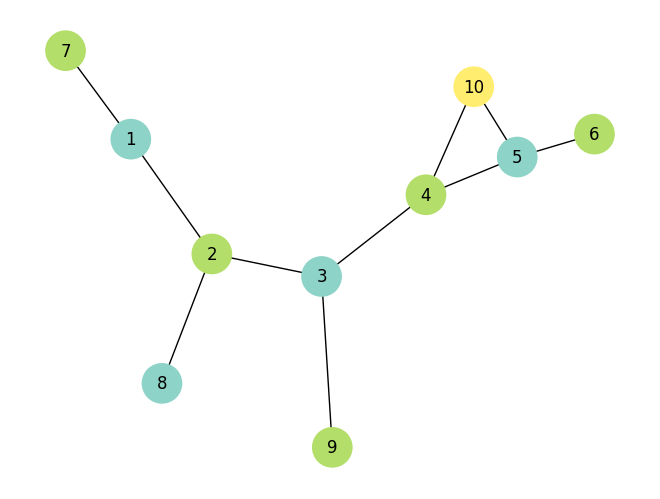

In [11]:
G = input_graph()
coloring, colors = graph_coloring(G)
print("Coloring of graph (node: color):")
for node, color in coloring.items():
    print(f"{node}: {color}")
visualize_graph(G, coloring)

In [ ]:
# Visualize interference.dot produced by enhanced10.exe
# This cell reads the DOT file and draws it with networkx + matplotlib.
import os
import pydot
import networkx as nx
import matplotlib.pyplot as plt

DOT = 'interference.dot'
if not os.path.exists(DOT):
    print(f"{DOT} not found. Run enhanced10.exe first to generate it.")
else:
    graphs = pydot.graph_from_dot_file(DOT)
    if not graphs:
        print('Failed to parse DOT file')
    else:
        g = graphs[0]
        G = nx.nx_pydot.from_pydot(g)
        labels = {}
        colors = []
        for n,d in G.nodes(data=True):
            lab = d.get('label', n)
            labels[n] = lab
            if '(' in lab and lab.endswith(')'):
                inside = lab.split('(')[-1][:-1]
                try:
                    colors.append(int(inside))
                except:
                    colors.append(-1)
            else:
                colors.append(-1)
        pos = nx.spring_layout(G)
        node_colors = []
        for c in colors:
            if c < 0:
                node_colors.append('lightgray')
            else:
                node_colors.append(plt.cm.tab10(c % 10))
        plt.figure(figsize=(8,6))
        nx.draw(G, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=900)
        plt.title('Interference Graph')
        plt.show()